In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
file_path = "C:\\Users\\Lenovo\\Desktop\\Robotic arm\\Dataset\\robotic_arm_dataset_multiple_trajectories.csv"
data = pd.read_csv(file_path)

In [8]:
print(data.head())
print(data.info())

   Axis_0_Angle  Axis_1_Angle  Axis_2_Angle
0      0.016775     -0.044620     -0.007160
1     -0.034135     -0.072073      0.049474
2     -0.020503     -0.101122      0.067382
3     -0.010456     -0.036021      0.046943
4     -0.023661      0.004108      0.040663
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152500 entries, 0 to 152499
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Axis_0_Angle  152500 non-null  float64
 1   Axis_1_Angle  152500 non-null  float64
 2   Axis_2_Angle  152500 non-null  float64
dtypes: float64(3)
memory usage: 3.5 MB
None


In [9]:
#Exploratory Data Analysis

print(data.isnull().sum())  # Count of missing values in each column


Axis_0_Angle    0
Axis_1_Angle    0
Axis_2_Angle    0
dtype: int64


In [11]:
print(data.describe())

        Axis_0_Angle   Axis_1_Angle   Axis_2_Angle
count  152500.000000  152500.000000  152500.000000
mean       -0.983302       0.000180       4.917986
std         4.967935       5.113029       2.933705
min       -11.362521      -9.762293      -0.251069
25%        -4.329537      -3.037366       2.375450
50%        -0.001038       0.000000       4.916169
75%         1.721202       3.508031       7.454463
max         8.255499      12.811728      10.190239


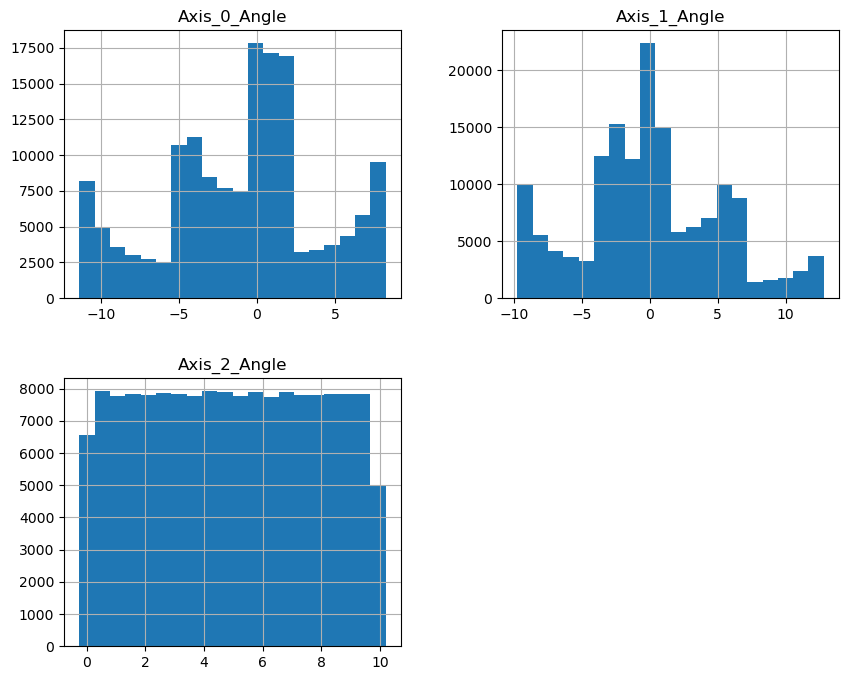

In [13]:
# distributions of numeric features
data.hist(bins=20, figsize=(10, 8))
plt.show()

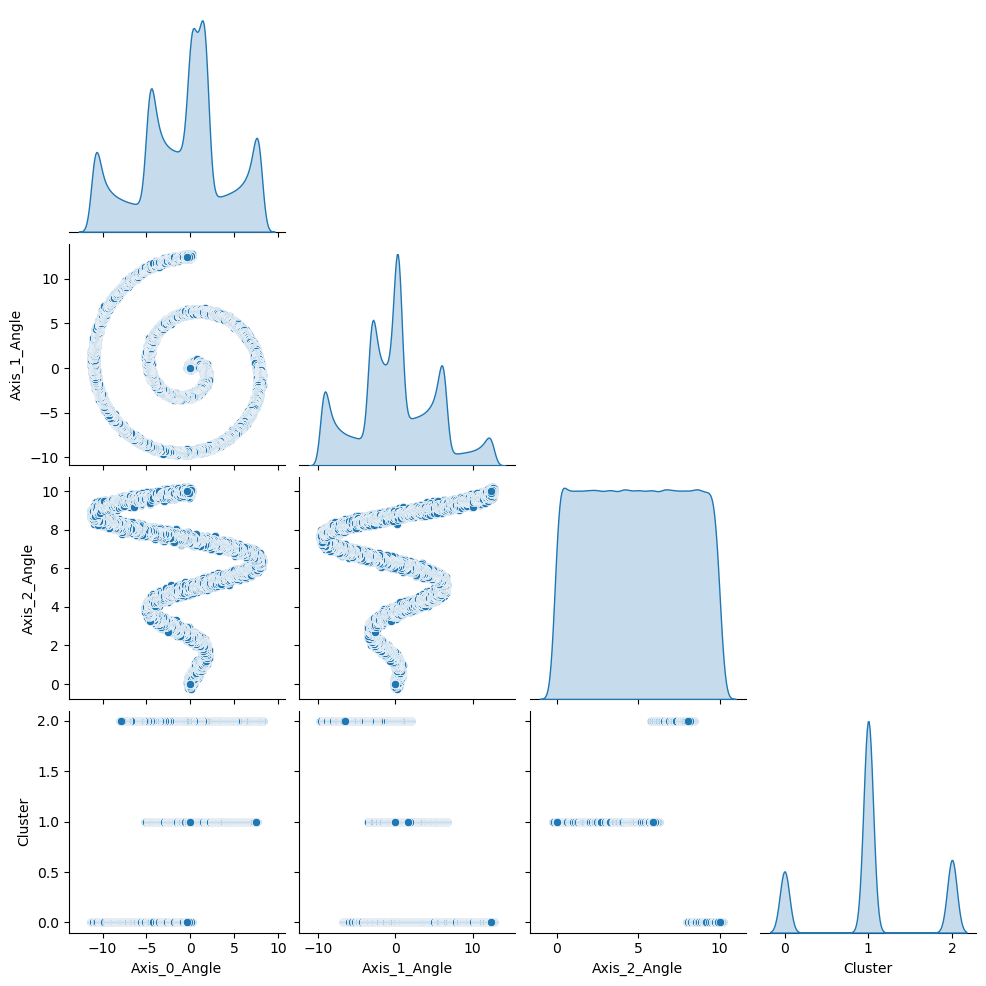

In [33]:
sns.pairplot(data, diag_kind='kde', corner=True)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12492\3085233318.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


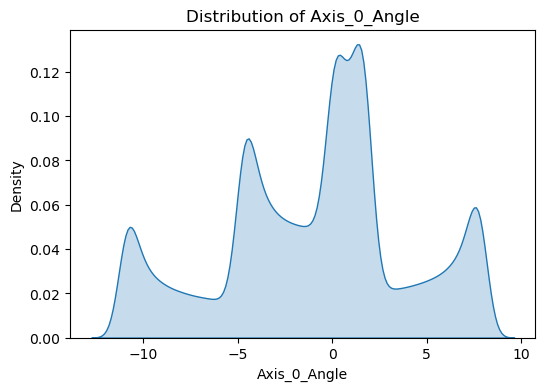

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12492\3085233318.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


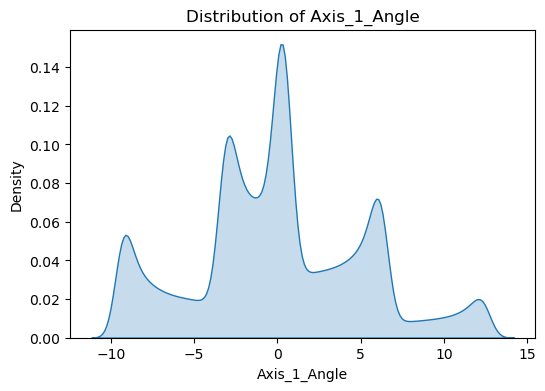

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12492\3085233318.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


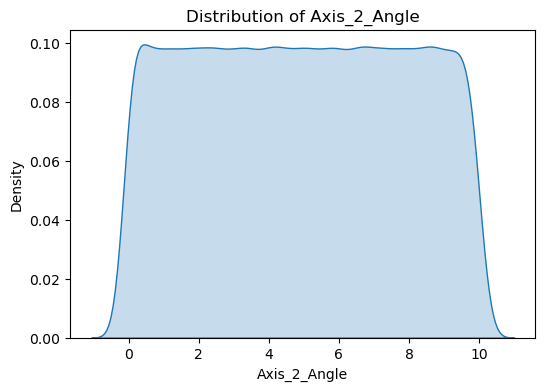

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12492\3085233318.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


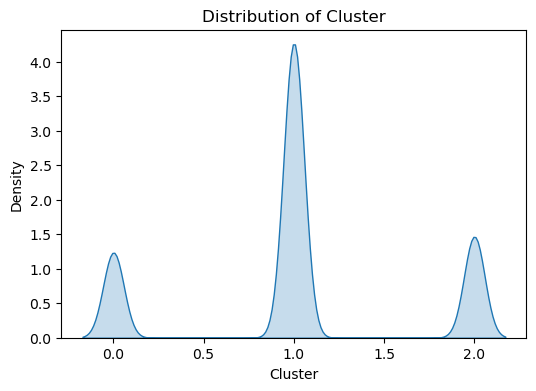

In [34]:
# KDE plots for numerical features
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data[column], shade=True)
    plt.title(f"Distribution of {column}")
    plt.show()


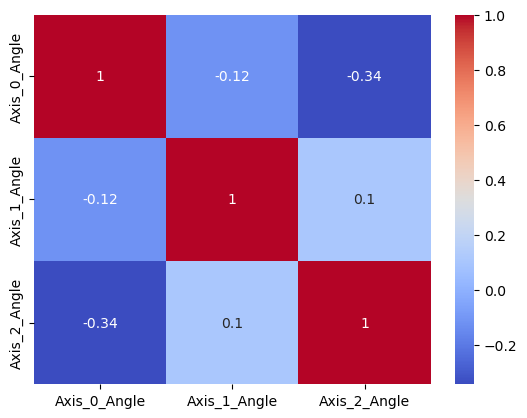

In [14]:
# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

In [19]:
#Data Preprocessing

#missing values

data.fillna(data.mean(), inplace=True)

# Converting categorical variables to numeric
df = pd.get_dummies(data, drop_first=True)



In [28]:
X = df[['Axis_0_Angle', 'Axis_1_Angle']]
y = df['Axis_2_Angle']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#Training and Evaluating Multiple Models

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



Mean Squared Error: 0.007237868587152374
R2 Score: 0.9991686371622068


In [26]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R2 scores:", cv_scores)
print("Mean R2:", cv_scores.mean())


Cross-validated R2 scores: [0.99913094 0.99910373 0.99908668 0.99912933 0.99905275]
Mean R2: 0.9991006875061738


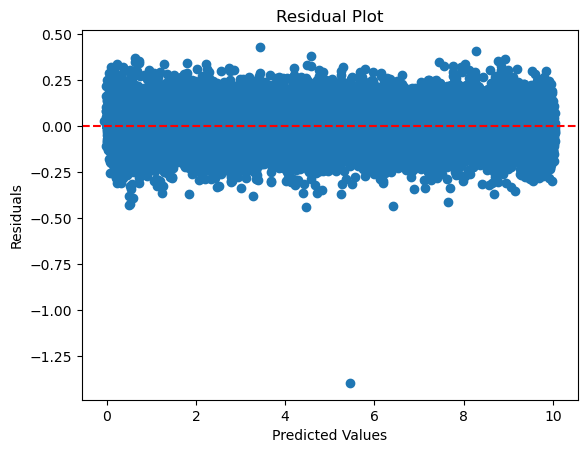

In [29]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

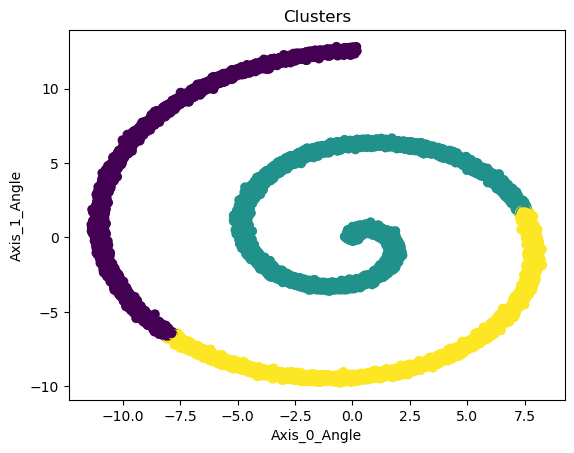

In [31]:
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding clusters to the dataframe
data['Cluster'] = clusters

# Visualize the clusters
plt.scatter(df['Axis_0_Angle'], df['Axis_1_Angle'], c=clusters, cmap='viridis')
plt.xlabel("Axis_0_Angle")
plt.ylabel("Axis_1_Angle")
plt.title("Clusters")
plt.show()